In [1]:
import pandas as pd
import seaborn as sns 
sns.set(color_codes=True)
import numpy as np
from matplotlib import pyplot as plt 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score

*Data Preprocessing* 

In [2]:
df = pd.read_csv('GOT_Transform_Batch2_v1.csv',low_memory=False)

In [3]:
df2=df.loc[:, df.columns.drop(['TRNSCR_DESCR', 'MUET','IELTS','NewID'])]
df2.head()

,MAX_STRM_id,GOT2,ACAD_CAREER,PROG_STATUS,PROG_ACTION,STATUS_DT,ADMIT_TERM,BEGIN_DT,END_DT,EXP_GRAD_TERM,...,T16:UNT_PASSD_GPA,T16:UNT_PASSD_NOGPA,T16:TOT_PASSD_GPA,T17:CUR_GPA,T17:CUM_GPA,T17:UNT_TAKEN_GPA,T17:UNT_TAKEN_NOGPA,T17:UNT_PASSD_GPA,T17:UNT_PASSD_NOGPA,T17:TOT_PASSD_GPA
0,1,N,DIPL,DC,DISC,"Wednesday, 30 August, 2017",1710,"Monday, 3 July, 2017","Sunday, 5 July, 2020",1930.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,N,UGRD,DC,DISC,"Monday, 2 April, 2018",1720,"Monday, 20 November, 2017","Sunday, 2 January, 2022",2110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,N,UGRD,DC,DISC,"Tuesday, 3 July, 2018",1720,"Monday, 20 November, 2017","Sunday, 2 January, 2022",2110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,N,UGRD,DC,DISC,"Monday, 9 April, 2018",1720,"Monday, 20 November, 2017","Sunday, 2 January, 2022",2110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,N,UGRD,DC,DISC,"Thursday, 25 January, 2018",1720,"Monday, 20 November, 2017","Sunday, 2 January, 2022",2110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.PROG_STATUS.value_counts()

CM    3544
AC     938
DC     390
DM     299
CN     292
LA      25
Name: PROG_STATUS, dtype: int64

In [5]:
df2=df.loc[:, df.columns.drop(['TRNSCR_DESCR', 'MUET','IELTS','NewID'])]
df2.head()


,MAX_STRM_id,GOT2,ACAD_CAREER,PROG_STATUS,PROG_ACTION,STATUS_DT,ADMIT_TERM,BEGIN_DT,END_DT,EXP_GRAD_TERM,...,T16:UNT_PASSD_GPA,T16:UNT_PASSD_NOGPA,T16:TOT_PASSD_GPA,T17:CUR_GPA,T17:CUM_GPA,T17:UNT_TAKEN_GPA,T17:UNT_TAKEN_NOGPA,T17:UNT_PASSD_GPA,T17:UNT_PASSD_NOGPA,T17:TOT_PASSD_GPA
0,1,N,DIPL,DC,DISC,"Wednesday, 30 August, 2017",1710,"Monday, 3 July, 2017","Sunday, 5 July, 2020",1930.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,N,UGRD,DC,DISC,"Monday, 2 April, 2018",1720,"Monday, 20 November, 2017","Sunday, 2 January, 2022",2110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,N,UGRD,DC,DISC,"Tuesday, 3 July, 2018",1720,"Monday, 20 November, 2017","Sunday, 2 January, 2022",2110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,N,UGRD,DC,DISC,"Monday, 9 April, 2018",1720,"Monday, 20 November, 2017","Sunday, 2 January, 2022",2110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,N,UGRD,DC,DISC,"Thursday, 25 January, 2018",1720,"Monday, 20 November, 2017","Sunday, 2 January, 2022",2110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
PROG_STATUS ={
    'CM':1,
    'AC':1,
    'DC':0,
    'DM':0,
    'CN':0,
    'LA':0
}

df2['PROG_STATUS'].replace(PROG_STATUS,inplace=True)
df2['PROG_STATUS'].astype(str).astype(int)
df2['PROG_STATUS']

0       0
1       0
2       0
3       0
4       0
       ..
5483    1
5484    1
5485    1
5486    1
5487    1
Name: PROG_STATUS, Length: 5488, dtype: int64

In [7]:
df2.select_dtypes(include = "float64").columns

Index(['EXP_GRAD_TERM', 'CREDITREQUIRED', 'CNT_DISC', 'TOT_TRNSFR',
       'T1:CUR_GPA', 'T1:CUM_GPA', 'T2:CUR_GPA', 'T2:CUM_GPA',
       'T2:UNT_TAKEN_GPA', 'T2:UNT_TAKEN_NOGPA',
       ...
       'T16:UNT_PASSD_GPA', 'T16:UNT_PASSD_NOGPA', 'T16:TOT_PASSD_GPA',
       'T17:CUR_GPA', 'T17:CUM_GPA', 'T17:UNT_TAKEN_GPA',
       'T17:UNT_TAKEN_NOGPA', 'T17:UNT_PASSD_GPA', 'T17:UNT_PASSD_NOGPA',
       'T17:TOT_PASSD_GPA'],
      dtype='object', length=118)

In [8]:
objList2 = df2.select_dtypes(include = "object").columns
print (objList2)
df2[objList2].isnull().sum()

Index(['GOT2', 'ACAD_CAREER', 'PROG_ACTION', 'STATUS_DT', 'BEGIN_DT', 'END_DT',
       'CAMPUS', 'SAD_LOAD_DESCR', 'ACAD_PLAN', 'ACAD_PROG_DESCR', 'ACAD_ORG',
       'DISABILITY', 'NATIONALITY', 'RACE', 'SEX', 'LOAN', 'SPONSOR',
       'SCHOLAR', 'N_FINAL_RSLT_DESCR', 'N_HONOUR_DESCR', 'INFO1'],
      dtype='object')


GOT2                     0
ACAD_CAREER              0
PROG_ACTION              0
STATUS_DT                0
BEGIN_DT                 0
END_DT                  39
CAMPUS                   0
SAD_LOAD_DESCR           0
ACAD_PLAN                0
ACAD_PROG_DESCR          0
ACAD_ORG                 0
DISABILITY               3
NATIONALITY              0
RACE                     2
SEX                      0
LOAN                  5437
SPONSOR               4944
SCHOLAR               5465
N_FINAL_RSLT_DESCR       1
N_HONOUR_DESCR          86
INFO1                  195
dtype: int64

In [9]:
objList3 = df2.select_dtypes(include = "float64").columns
df2[objList3].isnull().sum()

EXP_GRAD_TERM            39
CREDITREQUIRED            1
CNT_DISC               5089
TOT_TRNSFR             4355
T1:CUR_GPA                0
                       ... 
T17:UNT_TAKEN_GPA      5486
T17:UNT_TAKEN_NOGPA    5486
T17:UNT_PASSD_GPA      5486
T17:UNT_PASSD_NOGPA    5486
T17:TOT_PASSD_GPA      5486
Length: 118, dtype: int64

In [10]:
df2[objList3] = df2[objList3].fillna(0)
df2[objList3].isnull().sum()

EXP_GRAD_TERM          0
CREDITREQUIRED         0
CNT_DISC               0
TOT_TRNSFR             0
T1:CUR_GPA             0
                      ..
T17:UNT_TAKEN_GPA      0
T17:UNT_TAKEN_NOGPA    0
T17:UNT_PASSD_GPA      0
T17:UNT_PASSD_NOGPA    0
T17:TOT_PASSD_GPA      0
Length: 118, dtype: int64

In [11]:
objList2 = objList2.drop(['GOT2'])
objList2

Index(['ACAD_CAREER', 'PROG_ACTION', 'STATUS_DT', 'BEGIN_DT', 'END_DT',
       'CAMPUS', 'SAD_LOAD_DESCR', 'ACAD_PLAN', 'ACAD_PROG_DESCR', 'ACAD_ORG',
       'DISABILITY', 'NATIONALITY', 'RACE', 'SEX', 'LOAN', 'SPONSOR',
       'SCHOLAR', 'N_FINAL_RSLT_DESCR', 'N_HONOUR_DESCR', 'INFO1'],
      dtype='object')

*Label Encoding*

In [12]:

le = LabelEncoder()

for feat in objList2:
    df2[feat] = le.fit_transform(df2[feat].astype(str))

print (df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5488 entries, 0 to 5487
Columns: 154 entries, MAX_STRM_id to T17:TOT_PASSD_GPA
dtypes: float64(118), int32(20), int64(15), object(1)
memory usage: 6.0+ MB
None


In [13]:
df_drop_unuse = df2.drop(['MAX_STRM_id', 'PROG_ACTION', 'STATUS_DT', 'END_DT', 'CNT_DISC','INFO1','Prog_Length(Trimester)','TOT_CUMULATIVE','N_FINAL_RSLT_DESCR','N_HONOUR_DESCR'], axis=1)
df_drop_unuse.head()

,GOT2,ACAD_CAREER,PROG_STATUS,ADMIT_TERM,BEGIN_DT,EXP_GRAD_TERM,CAMPUS,SAD_LOAD_DESCR,ACAD_PLAN,ACAD_PROG_DESCR,...,T16:UNT_PASSD_GPA,T16:UNT_PASSD_NOGPA,T16:TOT_PASSD_GPA,T17:CUR_GPA,T17:CUM_GPA,T17:UNT_TAKEN_GPA,T17:UNT_TAKEN_NOGPA,T17:UNT_PASSD_GPA,T17:UNT_PASSD_NOGPA,T17:TOT_PASSD_GPA
0,N,0,0,1710,4,1930.0,1,0,27,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,N,3,0,1720,2,2110.0,1,0,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,N,3,0,1720,2,2110.0,1,0,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,N,3,0,1720,2,2110.0,1,0,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,N,3,0,1720,2,2110.0,1,0,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_drop_unuse['PROG_STATUS'].value_counts()

1    4482
0    1006
Name: PROG_STATUS, dtype: int64

In [15]:
NewProgStatus = df_drop_unuse.loc[df_drop_unuse['PROG_STATUS'] == 1]
NewProgStatus = NewProgStatus.iloc[:1006]
NewProgStatus_NO = df_drop_unuse.loc[df_drop_unuse['PROG_STATUS'] == 0]
NewProgStatus = NewProgStatus.append(NewProgStatus_NO)
NewProgStatus['PROG_STATUS'].value_counts()

C:\Users\about\AppData\Local\Temp\ipykernel_30220\425474992.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NewProgStatus = NewProgStatus.append(NewProgStatus_NO)


1    1006
0    1006
Name: PROG_STATUS, dtype: int64

In [16]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
NewProgStatus.isnull().sum()

GOT2                    0
ACAD_CAREER             0
PROG_STATUS             0
ADMIT_TERM              0
BEGIN_DT                0
EXP_GRAD_TERM           0
CAMPUS                  0
SAD_LOAD_DESCR          0
ACAD_PLAN               0
ACAD_PROG_DESCR         0
ACAD_ORG                0
DISABILITY              0
NATIONALITY             0
RACE                    0
SEX                     0
LOAN                    0
SPONSOR                 0
SCHOLAR                 0
CREDITREQUIRED          0
CUMM_UNT_PASSD_NOGPA    0
TOT_TRNSFR              0
MAX_TOT_PASSD_GPA       0
LATEST_CH_PASSD         0
MAX_STRM                0
SUM_UNT_PASSD_GPA       0
T1:CUR_GPA              0
T1:CUM_GPA              0
T1:UNT_TAKEN_GPA        0
T1:UNT_TAKEN_NOGPA      0
T1:UNT_PASSD_GPA        0
T1:UNT_PASSD_NOGPA      0
T1:TOT_PASSD_GPA        0
T2:CUR_GPA              0
T2:CUM_GPA              0
T2:UNT_TAKEN_GPA        0
T2:UNT_TAKEN_NOGPA      0
T2:UNT_PASSD_GPA        0
T2:UNT_PASSD_NOGPA      0
T2:TOT_PASSD

In [17]:
NewProgStatus.head()

,GOT2,ACAD_CAREER,PROG_STATUS,ADMIT_TERM,BEGIN_DT,EXP_GRAD_TERM,CAMPUS,SAD_LOAD_DESCR,ACAD_PLAN,ACAD_PROG_DESCR,ACAD_ORG,DISABILITY,NATIONALITY,RACE,SEX,LOAN,SPONSOR,SCHOLAR,CREDITREQUIRED,CUMM_UNT_PASSD_NOGPA,TOT_TRNSFR,MAX_TOT_PASSD_GPA,LATEST_CH_PASSD,MAX_STRM,SUM_UNT_PASSD_GPA,T1:CUR_GPA,T1:CUM_GPA,T1:UNT_TAKEN_GPA,T1:UNT_TAKEN_NOGPA,T1:UNT_PASSD_GPA,T1:UNT_PASSD_NOGPA,T1:TOT_PASSD_GPA,T2:CUR_GPA,T2:CUM_GPA,T2:UNT_TAKEN_GPA,T2:UNT_TAKEN_NOGPA,T2:UNT_PASSD_GPA,T2:UNT_PASSD_NOGPA,T2:TOT_PASSD_GPA,T3:CUR_GPA,T3:CUM_GPA,T3:UNT_TAKEN_GPA,T3:UNT_TAKEN_NOGPA,T3:UNT_PASSD_GPA,T3:UNT_PASSD_NOGPA,T3:TOT_PASSD_GPA,T4:CUR_GPA,T4:CUM_GPA,T4:UNT_TAKEN_GPA,T4:UNT_TAKEN_NOGPA,T4:UNT_PASSD_GPA,T4:UNT_PASSD_NOGPA,T4:TOT_PASSD_GPA,T5:CUR_GPA,T5:CUM_GPA,T5:UNT_TAKEN_GPA,T5:UNT_TAKEN_NOGPA,T5:UNT_PASSD_GPA,T5:UNT_PASSD_NOGPA,T5:TOT_PASSD_GPA,T6:CUR_GPA,T6:CUM_GPA,T6:UNT_TAKEN_GPA,T6:UNT_TAKEN_NOGPA,T6:UNT_PASSD_GPA,T6:UNT_PASSD_NOGPA,T6:TOT_PASSD_GPA,T7:CUR_GPA,T7:CUM_GPA,T7:UNT_TAKEN_GPA,T7:UNT_TAKEN_NOGPA,T7:UNT_PASSD_GPA,T7:UNT_PASSD_NOGPA,T7:TOT_PASSD_GPA,T8:CUR_GPA,T8:CUM_GPA,T8:UNT_TAKEN_GPA,T8:UNT_TAKEN_NOGPA,T8:UNT_PASSD_GPA,T8:UNT_PASSD_NOGPA,T8:TOT_PASSD_GPA,T9:CUR_GPA,T9:CUM_GPA,T9:UNT_TAKEN_GPA,T9:UNT_TAKEN_NOGPA,T9:UNT_PASSD_GPA,T9:UNT_PASSD_NOGPA,T9:TOT_PASSD_GPA,T10:CUR_GPA,T10:CUM_GPA,T10:UNT_TAKEN_GPA,T10:UNT_TAKEN_NOGPA,T10:UNT_PASSD_GPA,T10:UNT_PASSD_NOGPA,T10:TOT_PASSD_GPA,T11:CUR_GPA,T11:CUM_GPA,T11:UNT_TAKEN_GPA,T11:UNT_TAKEN_NOGPA,T11:UNT_PASSD_GPA,T11:UNT_PASSD_NOGPA,T11:TOT_PASSD_GPA,T12:CUR_GPA,T12:CUM_GPA,T12:UNT_TAKEN_GPA,T12:UNT_TAKEN_NOGPA,T12:UNT_PASSD_GPA,T12:UNT_PASSD_NOGPA,T12:TOT_PASSD_GPA,T13:CUR_GPA,T13:CUM_GPA,T13:UNT_TAKEN_GPA,T13:UNT_TAKEN_NOGPA,T13:UNT_PASSD_GPA,T13:UNT_PASSD_NOGPA,T13:TOT_PASSD_GPA,T14:CUR_GPA,T14:CUM_GPA,T14:UNT_TAKEN_GPA,T14:UNT_TAKEN_NOGPA,T14:UNT_PASSD_GPA,T14:UNT_PASSD_NOGPA,T14:TOT_PASSD_GPA,T15:CUR_GPA,T15:CUM_GPA,T15:UNT_TAKEN_GPA,T15:UNT_TAKEN_NOGPA,T15:UNT_PASSD_GPA,T15:UNT_PASSD_NOGPA,T15:TOT_PASSD_GPA,T16:CUR_GPA,T16:CUM_GPA,T16:UNT_TAKEN_GPA,T16:UNT_TAKEN_NOGPA,T16:UNT_PASSD_GPA,T16:UNT_PASSD_NOGPA,T16:TOT_PASSD_GPA,T17:CUR_GPA,T17:CUM_GPA,T17:UNT_TAKEN_GPA,T17:UNT_TAKEN_NOGPA,T17:UNT_PASSD_GPA,T17:UNT_PASSD_NOGPA,T17:TOT_PASSD_GPA
13,Y,3,1,1710,4,1910.0,1,0,1,7,5,3,18,4,1,1,23,3,126.0,20,37.0,69,126,1910,69,3.47,3.47,9,3,9,3,9,3.17,3.28,15.0,3.0,15.0,3.0,24.0,2.93,3.19,9.0,0.0,9.0,0.0,33.0,3.84,3.39,15.0,3.0,15.0,3.0,48.0,3.82,3.51,18.0,0.0,18.0,0.0,66.0,0.00,3.51,0.0,6.0,0.0,6.0,66.0,4.00,3.53,3.0,5.0,3.0,5.0,69.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,Y,3,1,1710,4,1830.0,1,0,1,7,5,3,18,3,0,1,23,3,126.0,20,37.0,69,126,1830,69,2.55,2.55,12,6,12,6,12,2.32,2.42,15.0,5.0,12.0,5.0,24.0,2.71,2.49,9.0,0.0,9.0,0.0,33.0,2.29,2.44,15.0,3.0,15.0,3.0,48.0,2.60,2.52,21.0,0.0,21.0,0.0,69.0,0.00,2.52,0.0,6.0,0.0,6.0,69.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,Y,3,1,1630,3,1830.0,1,0,1,7,5,3,18,4,0,1,23,3,126.0,20,37.0,69,126,1830,69,3.71,3.71,9,0,9,0,9,3.45,3.56,12.0,3.0,12.0,3.0,21.0,2.87,3.24,18.0,0.0,18.0,0.0,39.0,0.00,3.24,0.0,6.0,0.0,6.0,39.0,3.23,3.24,12.0,3.0,12.0,3.0,51.0,3.67,3.32,12.0,6.0,12.0,6.0,63.0,3.70,3.35,6.0,2.0,6.0,2.0,69.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,Y,3,1,1710,4,1910.0,1,0,1,7,5,3,18,3,1,1,23,3,126

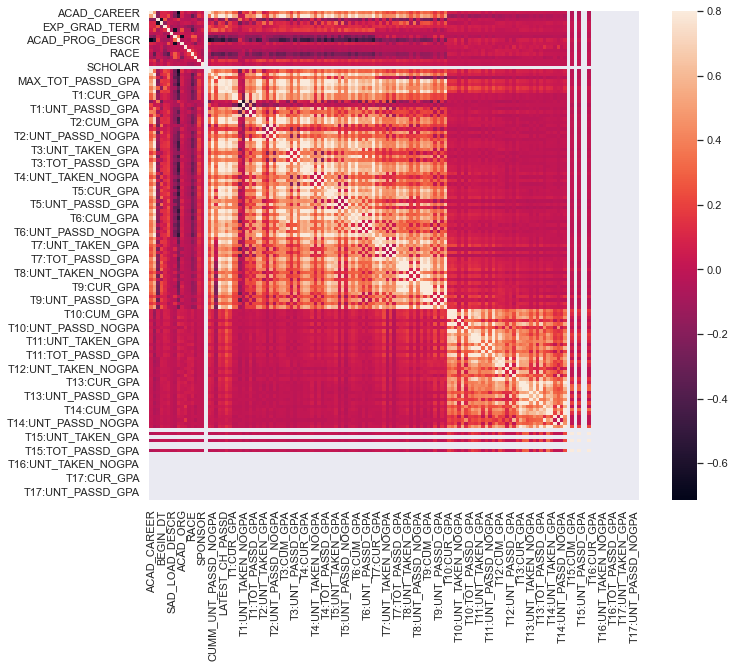

In [18]:
corrmat = NewProgStatus.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

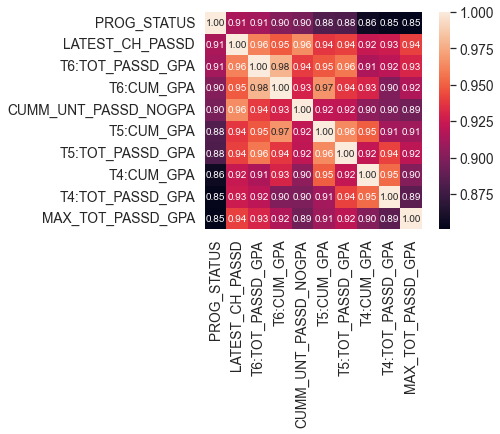

In [19]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'PROG_STATUS')['PROG_STATUS'].index
cm = np.corrcoef(NewProgStatus[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import imblearn
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import csv
from sklearn.model_selection import cross_val_score

In [21]:
NewProgStatus.PROG_STATUS


13      1
14      1
15      1
16      1
17      1
19      1
20      1
21      1
22      1
23      1
24      1
27      1
29      1
31      1
32      1
33      1
34      1
35      1
37      1
38      1
41      1
43      1
44      1
45      1
46      1
48      1
51      1
52      1
56      1
60      1
61      1
62      1
63      1
64      1
65      1
66      1
67      1
69      1
70      1
74      1
75      1
76      1
78      1
79      1
81      1
82      1
83      1
84      1
85      1
86      1
87      1
88      1
89      1
90      1
96      1
101     1
104     1
105     1
107     1
109     1
111     1
113     1
114     1
116     1
117     1
118     1
119     1
120     1
125     1
126     1
130     1
132     1
133     1
134     1
136     1
137     1
141     1
143     1
144     1
145     1
146     1
147     1
149     1
150     1
151     1
152     1
153     1
155     1
156     1
157     1
159     1
160     1
161     1
164     1
165     1
167     1
169     1
170     1
171     1
172     1


In [22]:
NewProgStatus = NewProgStatus.drop("GOT2", axis=1)

*Feature Selection*

143
---------Top 10----------
              Features  Score
0          ACAD_CAREER    1.0
74    T8:UNT_TAKEN_GPA    1.0
72          T8:CUR_GPA    1.0
1           ADMIT_TERM    1.0
70  T7:UNT_PASSD_NOGPA    1.0
69    T7:UNT_PASSD_GPA    1.0
68  T7:UNT_TAKEN_NOGPA    1.0
67    T7:UNT_TAKEN_GPA    1.0
66          T7:CUM_GPA    1.0
65          T7:CUR_GPA    1.0
---------Bottom 10----------
                Features  Score
128          T16:CUR_GPA    0.0
126  T15:UNT_PASSD_NOGPA    0.0
124  T15:UNT_TAKEN_NOGPA    0.0
123    T15:UNT_TAKEN_GPA    0.0
122          T15:CUM_GPA    0.0
121          T15:CUR_GPA    0.0
119  T14:UNT_PASSD_NOGPA    0.0
5         SAD_LOAD_DESCR    0.0
13                  LOAN    0.0
141    T17:TOT_PASSD_GPA    0.0


c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

NB acc=  94.57909090909092
DT acc=  98.4028282828283
KNN acc=  97.96646464646467
SVM acc=  94.39131313131311
RFC acc=  97.6608080808081
LOR acc=  98.69656565656565


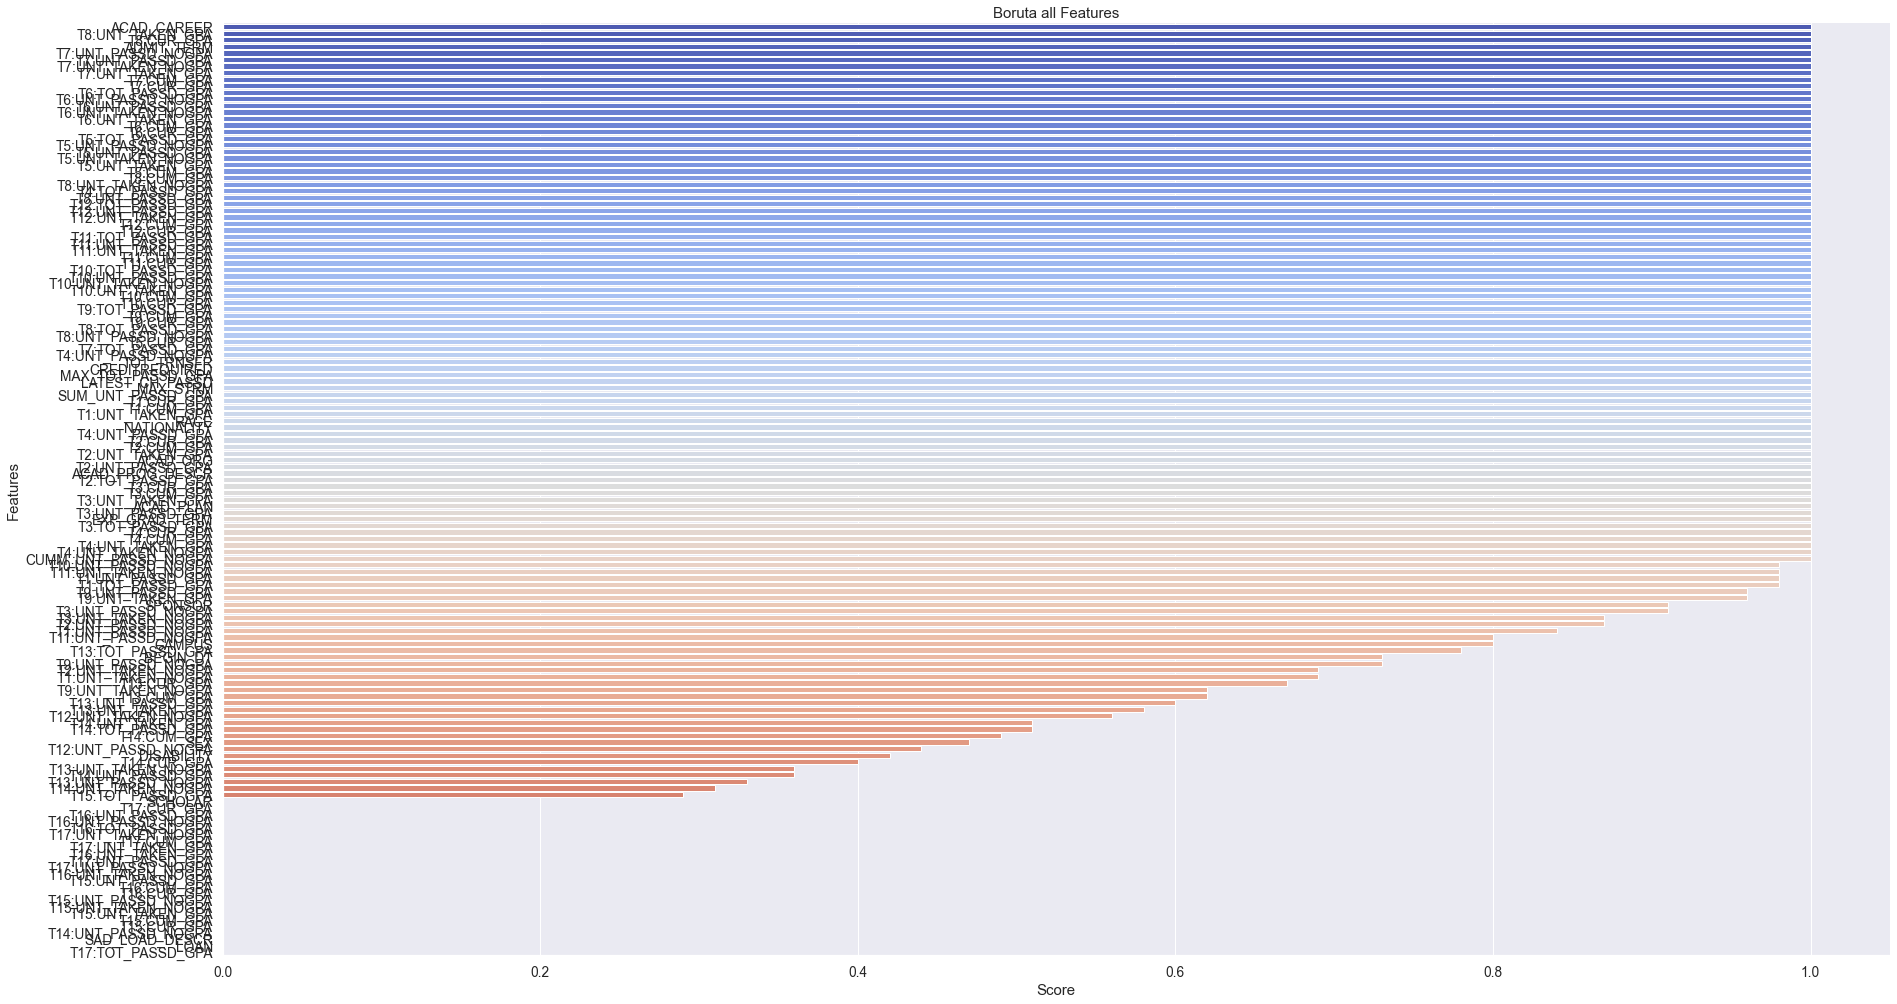

In [23]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

print(len(NewProgStatus.columns))

y = NewProgStatus.PROG_STATUS
X = NewProgStatus.drop("PROG_STATUS", axis=1)
colnames = X.columns

model = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

feat_selector = BorutaPy(
    verbose=0,
    estimator=model,
    n_estimators='auto',
    max_iter=100  # number of iterations to perform
)



feat_selector.fit(X.values, y)

boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

print('---------Top 10----------')
print(boruta_score.head(10))

print('---------Bottom 10----------')
print(boruta_score.tail(10))

sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[:], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("Boruta all Features")

model_list = ["NB", "DT", "KNN", "SVM", "RFC", "LOR"]
feature_num, acc_nb, acc_dt, acc_knn, acc_svm, acc_rfc, acc_lor = [], [], [], [], [], [], []

for i in range(1, 100):
    feature_num.append(i)
    for model in model_list:
        
        # Create X and y dataset
        
        y = NewProgStatus.PROG_STATUS
        X = NewProgStatus.drop("PROG_STATUS", axis=1)
        
        cols = boruta_score.Features.iloc[:]
        X = X[cols].copy()
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        
        if model == "NB":
            clf = GaussianNB()
        elif model == "DT":
            clf = DecisionTreeClassifier(max_depth=3) 
        elif model == "KNN":
            clf = KNeighborsClassifier(n_neighbors=3)
        elif model == "SVM":
            clf = svm.SVC()
        elif model == 'RFC':
            clf = RandomForestClassifier(max_depth=3)
        elif model == 'LOR':
            clf = LogisticRegression(max_iter=200)
        
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        acc = round((accuracy_score(y_test, y_pred)*100), 2)
        
        if model == "NB":
            acc_nb.append(acc)
        elif model == "DT":
            acc_dt.append(acc) 
        elif model == "KNN":
            acc_knn.append(acc)
        elif model == "SVM":
            acc_svm.append(acc)
        elif model == "RFC":
            acc_rfc.append(acc)
        elif model == "LOR":
            acc_lor.append(acc) 
            
# your codes here...
boruta_acc_result = pd.DataFrame(list(zip(feature_num,
                                         acc_nb,
                                         acc_dt,
                                         acc_knn,
                                         acc_svm,
                                         acc_rfc,
                                         acc_lor)),
                                columns = ["No_Of_Features",
                                          "NB",
                                          "DT",
                                          "KNN",
                                          "SVM",
                                          "RFC",
                                          "LOR"])

print("NB acc= ",boruta_acc_result['NB'].mean())
print("DT acc= ",boruta_acc_result['DT'].mean())
print("KNN acc= ",boruta_acc_result['KNN'].mean())
print("SVM acc= ",boruta_acc_result['SVM'].mean())
print("RFC acc= ",boruta_acc_result['RFC'].mean())
print("LOR acc= ",boruta_acc_result['LOR'].mean())

boruta_acc_result = pd.melt(boruta_acc_result,
                           id_vars = "No_Of_Features",
                           var_name = "Model",
                           value_name = "Accuracy")

In [24]:
boruta_score.Features.iloc[:30]

0             ACAD_CAREER
74       T8:UNT_TAKEN_GPA
72             T8:CUR_GPA
1              ADMIT_TERM
70     T7:UNT_PASSD_NOGPA
69       T7:UNT_PASSD_GPA
68     T7:UNT_TAKEN_NOGPA
67       T7:UNT_TAKEN_GPA
66             T7:CUM_GPA
65             T7:CUR_GPA
64       T6:TOT_PASSD_GPA
63     T6:UNT_PASSD_NOGPA
62       T6:UNT_PASSD_GPA
61     T6:UNT_TAKEN_NOGPA
60       T6:UNT_TAKEN_GPA
59             T6:CUM_GPA
58             T6:CUR_GPA
57       T5:TOT_PASSD_GPA
56     T5:UNT_PASSD_NOGPA
55       T5:UNT_PASSD_GPA
54     T5:UNT_TAKEN_NOGPA
53       T5:UNT_TAKEN_GPA
52             T5:CUM_GPA
73             T8:CUM_GPA
75     T8:UNT_TAKEN_NOGPA
50       T4:TOT_PASSD_GPA
76       T8:UNT_PASSD_GPA
106     T12:TOT_PASSD_GPA
104     T12:UNT_PASSD_GPA
102     T12:UNT_TAKEN_GPA
Name: Features, dtype: object

<AxesSubplot: >

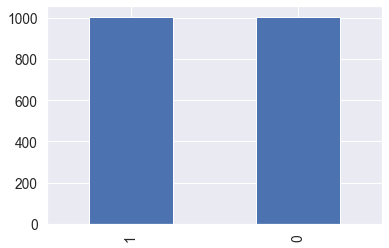

In [25]:
NewProgStatus['PROG_STATUS'].value_counts().plot(kind='bar')

*Modelling and Model Evaluation*

1    1006
0    1006
Name: PROG_STATUS, dtype: int64
1    1006
0    1006
Name: PROG_STATUS, dtype: int64
rf_SMOTE Accuracy Score: 0.9860834990059643
svc_SMOTE Accuracy Score: 0.937375745526839
kn_SMOTE Accuracy Score: 0.9731610337972167
DecisionTree_SMOTE Accuracy Score: 0.9811133200795229
gnb_SMOTE Accuracy Score: 0.9443339960238568


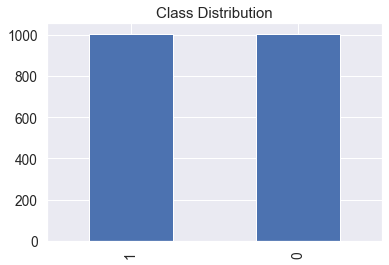

In [26]:
print(NewProgStatus["PROG_STATUS"].value_counts())
NewProgStatus["PROG_STATUS"].value_counts().plot(kind="bar")
plt.title("Class Distribution")


X = NewProgStatus.drop("PROG_STATUS", axis=1)
y = NewProgStatus["PROG_STATUS"]
features = X.columns

print(y.value_counts())
y.value_counts().plot(kind="bar")
plt.title("Class Distribution")

#-------------------------------------------------------------

#split SMOTE data in XY
y = NewProgStatus.PROG_STATUS
X = NewProgStatus.drop("PROG_STATUS", axis=1)

cols = boruta_score.Features.iloc[:]
X = X[cols].copy()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

#-------------------------------------------------------------

#Train and do prediction with default parameter
#RandomForest
rf_SMOTE = RandomForestClassifier()
rf_SMOTE.fit(X_train, y_train)
ypred = rf_SMOTE.predict(X_test)
print("rf_SMOTE Accuracy Score:", accuracy_score(y_test, ypred))

#SVM
svc_SMOTE = SVC(kernel='rbf')
svc_SMOTE.fit(X_train, y_train)
ypred = svc_SMOTE.predict(X_test)
print("svc_SMOTE Accuracy Score:", accuracy_score(y_test, ypred))

#knn
kn_SMOTE = KNeighborsClassifier()
kn_SMOTE.fit(X_train, y_train)
ypred = kn_SMOTE.predict(X_test)
print("kn_SMOTE Accuracy Score:", accuracy_score(y_test, ypred))

#Decission Tree
dtc_SMOTE = DecisionTreeClassifier()
dtc_SMOTE.fit(X_train, y_train)
ypred = dtc_SMOTE.predict(X_test)
print("DecisionTree_SMOTE Accuracy Score:", accuracy_score(y_test, ypred))

#GaussianNB
gnb_SMOTE = GaussianNB()
gnb_SMOTE.fit(X_train, y_train)
ypred = gnb_SMOTE.predict(X_test)
print("gnb_SMOTE Accuracy Score:", accuracy_score(y_test, ypred))

*Perform Hyperparameter*

In [27]:
criterion = ['gini','entropy']
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'criterion':criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': False}


c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


rf_SMOTE(Hyperparameter) Accuracy Score: 0.9870775347912525
rf_SMOTE(Hyperparameter) ROC Score: 0.9971877470355731
rf_SMOTE(Hyperparameter) Precision Score: 0.9879759519038076
rf_SMOTE(Hyperparameter) F1 Score: 0.986986986986987
tree_clas_SMOTE(Hyperparameter) Recall: 0.986


c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

rf_SMOTE(Hyperparameter) CV Score: [0.98759305 0.99751861 0.95522388 0.98507463 0.88308458]


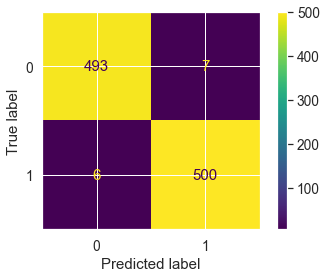

In [28]:
k_folds = KFold(n_splits = 5)

rf_SMOTE = RandomForestClassifier(n_estimators= 1600,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features= 'auto',
 max_depth= 90,
 criterion= 'entropy',
 bootstrap= False)
rf_SMOTE.fit(X_train, y_train)
ypred = rf_SMOTE.predict(X_test)


print("rf_SMOTE(Hyperparameter) Accuracy Score:", accuracy_score(y_test, ypred))
print("rf_SMOTE(Hyperparameter) ROC Score:", roc_auc_score(y_test, rf_SMOTE.predict_proba(X_test)[:,1]))
print("rf_SMOTE(Hyperparameter) Precision Score:", precision_score(y_test, ypred, average="binary", pos_label=0))
print("rf_SMOTE(Hyperparameter) F1 Score:", f1_score(y_test, ypred, average="binary", pos_label=0))
print("tree_clas_SMOTE(Hyperparameter) Recall:", recall_score(y_test, ypred, average="binary", pos_label=0))
print("rf_SMOTE(Hyperparameter) CV Score:", cross_val_score(rf_SMOTE, X, y, cv = k_folds))
ConfusionMatrixDisplay.from_predictions(y_test, ypred)
plt.show()

In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

print(grid.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END ..............................C=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..............................C=0.1, ke

svc_SMOTE(Hyperparameter) Accuracy Score: 0.9751491053677932
svc_SMOTE(Hyperparameter) Precision Score: 0.9797979797979798
svc_SMOTE(Hyperparameter) F1 Score: 0.9748743718592964
rf_SMOTE(Hyperparameter) CV Score: [0.99255583 0.99751861 0.93781095 0.97512438 0.83084577]
tree_clas_SMOTE(Hyperparameter) Recall: 0.97


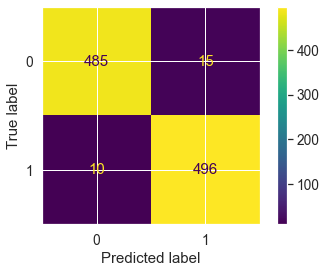

In [30]:
svc_SMOTE = SVC(C=100, kernel='poly')
svc_SMOTE.fit(X_train, y_train)
ypred = svc_SMOTE.predict(X_test)
print("svc_SMOTE(Hyperparameter) Accuracy Score:", accuracy_score(y_test, ypred))

print("svc_SMOTE(Hyperparameter) Precision Score:", precision_score(y_test, ypred, average="binary", pos_label=0))
print("svc_SMOTE(Hyperparameter) F1 Score:", f1_score(y_test, ypred, average="binary", pos_label=0))
print("rf_SMOTE(Hyperparameter) CV Score:", cross_val_score(svc_SMOTE, X, y, cv = k_folds))
print("tree_clas_SMOTE(Hyperparameter) Recall:", recall_score(y_test, ypred, average="binary", pos_label=0))
ConfusionMatrixDisplay.from_predictions(y_test, ypred)
plt.show()

In [31]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid.fit(X_train,y_train)

print(grid.best_params_)

accuracy = grid.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy))

Fitting 10 folds for each of 30 candidates, totalling 300 fits


{'n_neighbors': 1}
Accuracy for our training dataset with tuning is : 97.91%


knn_SMOTE(Hyperparameter) Accuracy for our testing dataset with tuning is : 0.9761431411530815
knn_SMOTE(Hyperparameter) Accuracy Score: 0.9761431411530815
knn_SMOTE(Hyperparameter) ROC Score: 0.9836343873517785
knn_SMOTE(Hyperparameter) Precision Score: 0.9779116465863453
knn_SMOTE(Hyperparameter) F1 Score: 0.9759519038076152
knn_SMOTE(Hyperparameter) CV Score: [0.74937965 0.98014888 0.94278607 0.97014925 0.90049751]
tree_clas_SMOTE(Hyperparameter) Recall: 0.974


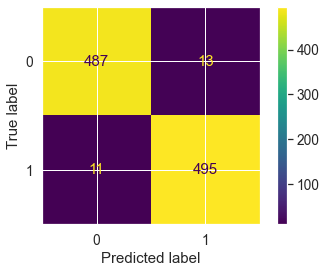

In [32]:
knn_SMOTE = KNeighborsClassifier(n_neighbors=2)
knn_SMOTE.fit(X_train,y_train)
ypred=knn_SMOTE.predict(X_test) 
accuracy=accuracy_score(y_test,ypred)
print("knn_SMOTE(Hyperparameter) Accuracy for our testing dataset with tuning is :",accuracy )
print("knn_SMOTE(Hyperparameter) Accuracy Score:", accuracy_score(y_test, ypred))
print("knn_SMOTE(Hyperparameter) ROC Score:", roc_auc_score(y_test, knn_SMOTE.predict_proba(X_test)[:,1]))
print("knn_SMOTE(Hyperparameter) Precision Score:", precision_score(y_test, ypred, average="binary", pos_label=0))
print("knn_SMOTE(Hyperparameter) F1 Score:", f1_score(y_test, ypred, average="binary", pos_label=0))
print("knn_SMOTE(Hyperparameter) CV Score:", cross_val_score(knn_SMOTE, X, y, cv = k_folds))
print("tree_clas_SMOTE(Hyperparameter) Recall:", recall_score(y_test, ypred, average="binary", pos_label=0))
ConfusionMatrixDisplay.from_predictions(y_test, ypred)
plt.show()

In [33]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas_SMOTE = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas_SMOTE, param_grid=param_grid, cv=5, verbose=1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and

{'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto'}


c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and

tree_clas_SMOTE(Hyperparameter) Accuracy Score: 0.9801192842942346
tree_clas_SMOTE(Hyperparameter) ROC Score: 0.9801185770750989
tree_clas_SMOTE(Hyperparameter) Precision Score: 0.98
tree_clas_SMOTE(Hyperparameter) F1 Score: 0.98
tree_clas_SMOTE(Hyperparameter) CV Score: [0.81141439 0.99007444 0.94776119 0.97512438 0.89054726]
tree_clas_SMOTE(Hyperparameter) Recall: 0.98


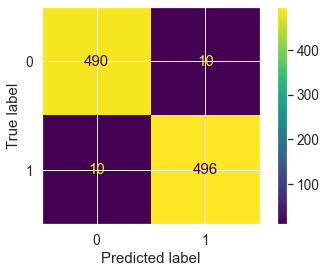

In [34]:
param_grid = {'max_features': 'auto',
              'ccp_alpha': 0.01,
              'max_depth' : 6,
              'criterion' :'entropy'
             }
tree_clas_SMOTE = DecisionTreeClassifier(random_state=1024)
tree_clas_SMOTE.fit(X_train, y_train)
ypred = tree_clas_SMOTE.predict(X_test)
print("tree_clas_SMOTE(Hyperparameter) Accuracy Score:", accuracy_score(y_test, ypred))
print("tree_clas_SMOTE(Hyperparameter) ROC Score:", roc_auc_score(y_test, tree_clas_SMOTE.predict_proba(X_test)[:,1]))
print("tree_clas_SMOTE(Hyperparameter) Precision Score:", precision_score(y_test, ypred, average="binary", pos_label=0))
print("tree_clas_SMOTE(Hyperparameter) F1 Score:", f1_score(y_test, ypred, average="binary", pos_label=0))
print("tree_clas_SMOTE(Hyperparameter) CV Score:", cross_val_score(tree_clas_SMOTE, X, y, cv = k_folds))
print("tree_clas_SMOTE(Hyperparameter) Recall:", recall_score(y_test, ypred, average="binary", pos_label=0))
ConfusionMatrixDisplay.from_predictions(y_test, ypred)

plt.show()

*Stacking Ensembke Learning*

In [35]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

In [36]:
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('cart', DecisionTreeClassifier(max_features= 'auto', ccp_alpha= 0.01, max_depth= 6,criterion= 'entropy')))
    level0.append(('rf', RandomForestClassifier(n_estimators= 1600,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features= 'auto',
 max_depth= 90,
 criterion= 'entropy',
 bootstrap= False)))   
    level0.append(('knn', KNeighborsClassifier(n_neighbors=2)))
    
    # define the stacking ensemble
       
    level1 = GaussianNB()     
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
        
    
    return model

In [37]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
models = dict()
# your codes here...
models['cart'] = DecisionTreeClassifier(max_features= 'auto', ccp_alpha= 0.01, max_depth= 6,criterion= 'entropy')

models['knn']= KNeighborsClassifier(n_neighbors=2)

models['rf'] = RandomForestClassifier(n_estimators= 1600,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features= 'auto',
 max_depth= 90,
 criterion= 'entropy',
 bootstrap= False)

models['stacking'] = get_stacking()

In [38]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>cart 0.973 (0.014)
>knn 0.980 (0.009)
>rf 0.990 (0.008)
>stacking 0.987 (0.008)


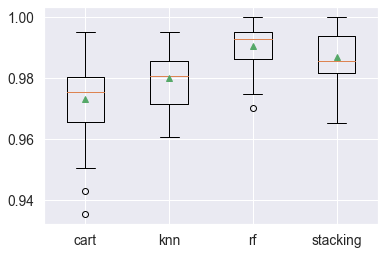

In [39]:
from numpy import mean
from numpy import std
results, names = list(), list()
for name, model in models.items():
    scores =evaluate_model(model,X,y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name,mean(scores),std(scores)))

# plot model performance for comparison - based on f1-score
plt.boxplot(results, labels=names, showmeans=True)
plt.show()